In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

In [23]:
data = pd.read_csv('kaggle-survey-2018/multipleChoiceResponses.csv')
questions = data.iloc[:1]
data1 = data.iloc[1:]

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# POPULATION OF THE COUNTRIES

In [4]:
pop_data = pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv").iloc[2624:]

In [5]:
pop2016condition = pop_data['Year'] == 2016
pop_data = pop_data[pop2016condition]

In [6]:
pop_data['Country Name'] = pop_data['Country Name'].replace('United States', 'United States of America')
pop_data['Country Name'] = pop_data['Country Name'].replace('United Kingdom', 'United Kingdom of Great Britain and Northern Ireland')
pop_data['Country Name'] = pop_data['Country Name'].replace('Iran, Islamic Rep.', 'Iran, Islamic Republic of...')
pop_data['Country Name'] = pop_data['Country Name'].replace("Korea, Dem. People's Rep.", 'Republic of Korea')
pop_data['Country Name'] = pop_data['Country Name'].replace("Korea, Rep.", 'South Korea')
pop_data['Country Name'] = pop_data['Country Name'].replace("Hong Kong SAR, China", "Hong Kong (S.A.R.)")

In [7]:
participation = Counter(data1['Q3'])

pop_data['new_index'] = range(len(pop_data)) #orders the list
pop_data = pop_data.set_index('new_index')
populations = {}
for l in range(len(pop_data['Country Name'])):
    populations[pop_data['Country Name'][l]] = pop_data['Value'][l]

porc_data = {}
for i in pop_data['Country Name']:
    if i in Counter(data1['Q3']):
        porc_data[i] = (participation[i]/populations[i])*100

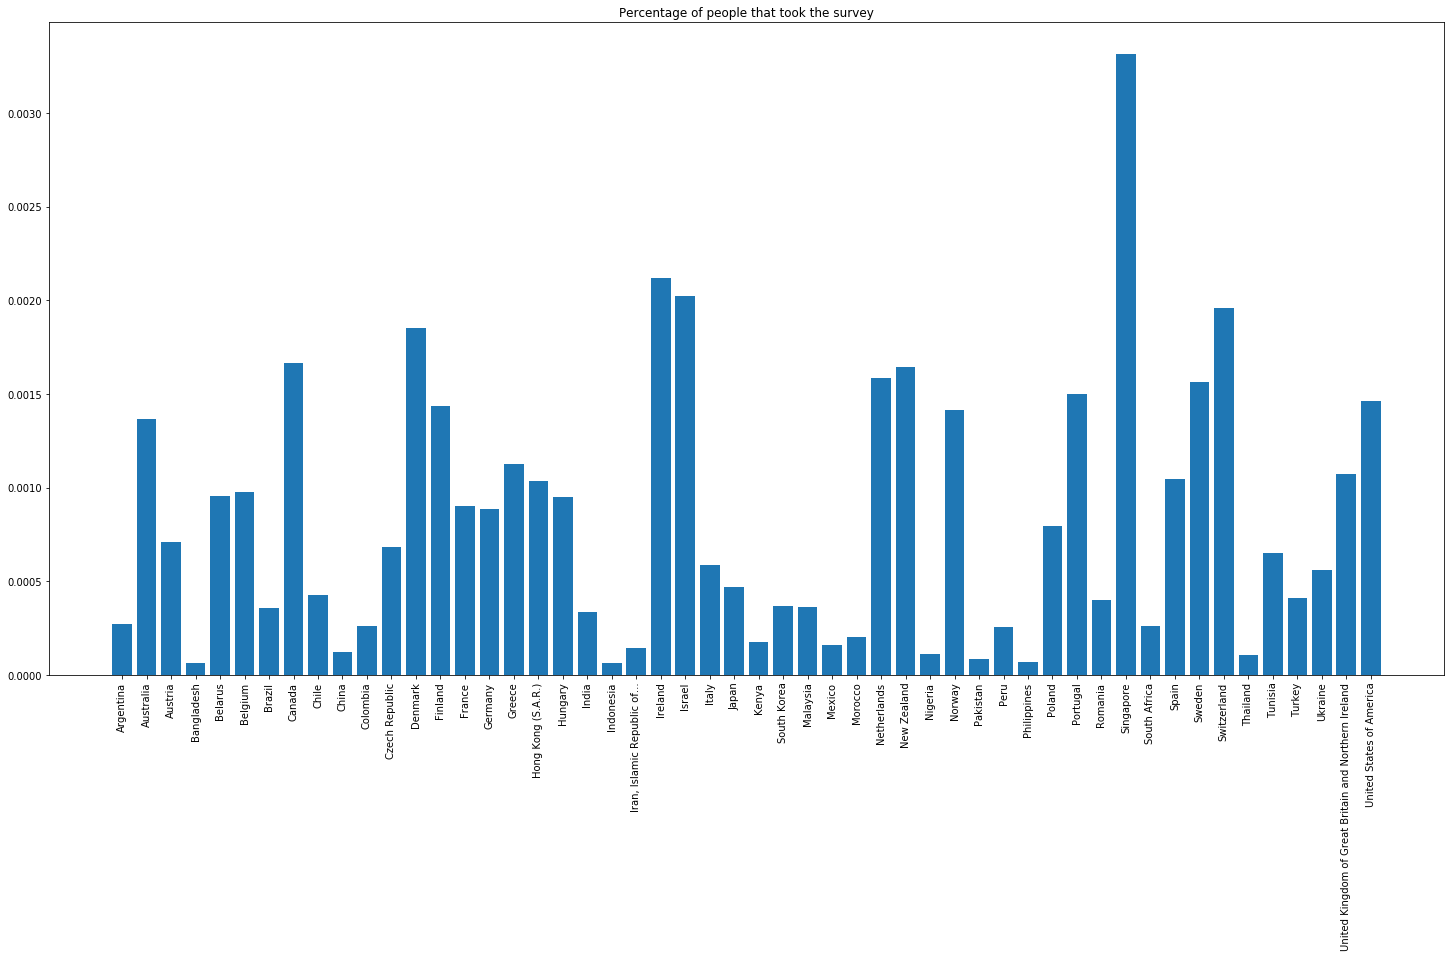

In [8]:
plt.figure(figsize=(25,12))
plt.bar(porc_data.keys(),porc_data.values())
plt.xticks(rotation=90)
plt.title('Percentage of people that took the survey')
plt.show()

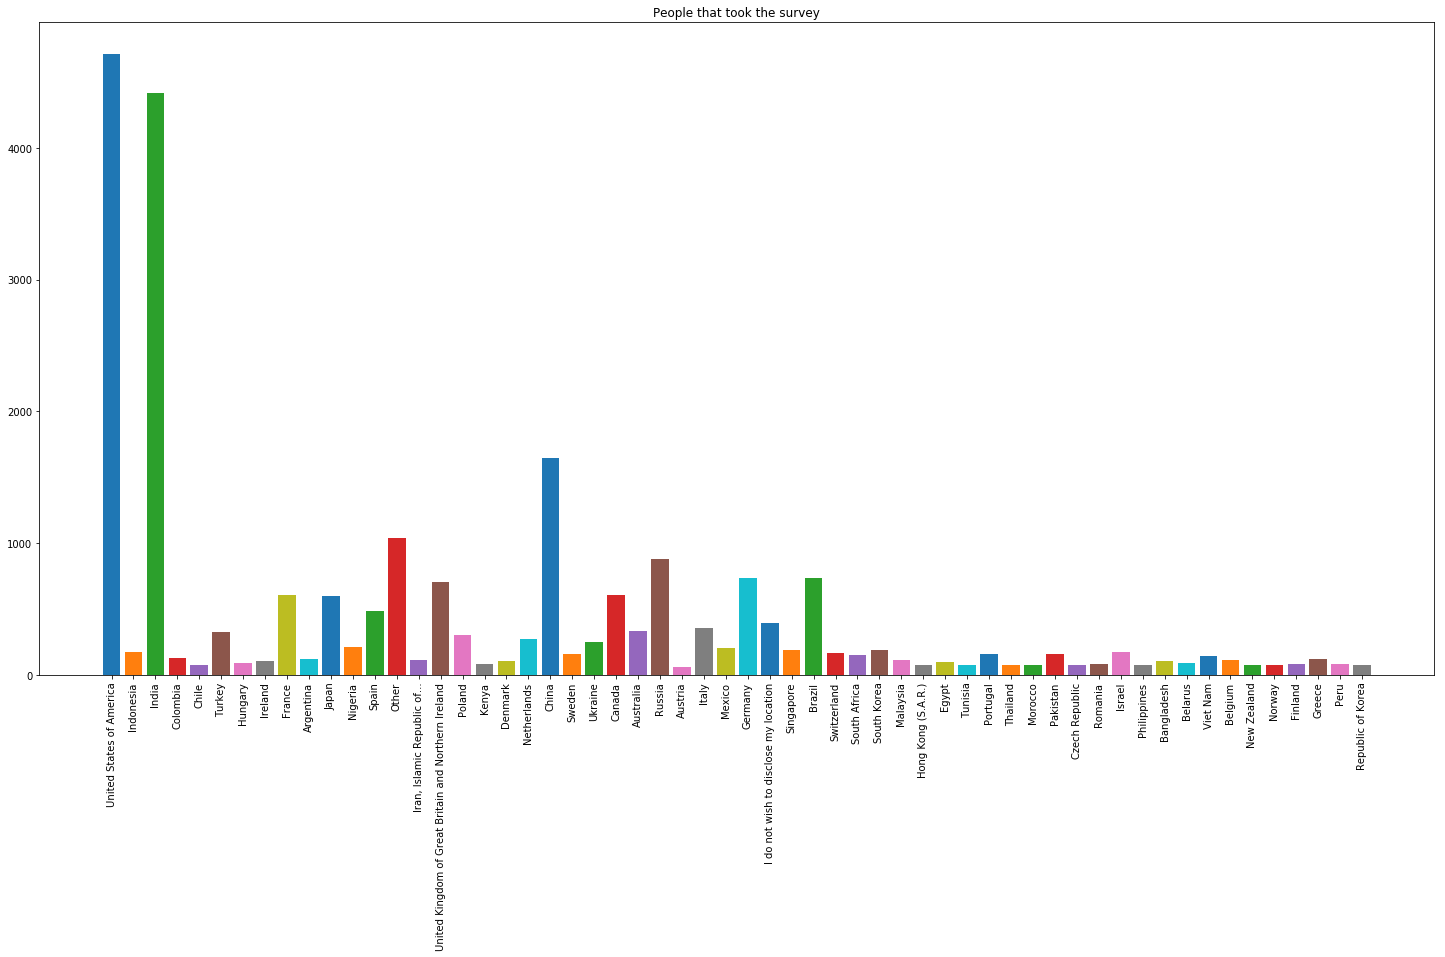

In [9]:
plt.figure(figsize=(25,12))
for i in Counter(data1["Q3"]):
    plt.bar(i,Counter(data1["Q3"])[i])
plt.xticks(rotation=90)
plt.title('People that took the survey')
plt.show()

# GENDER

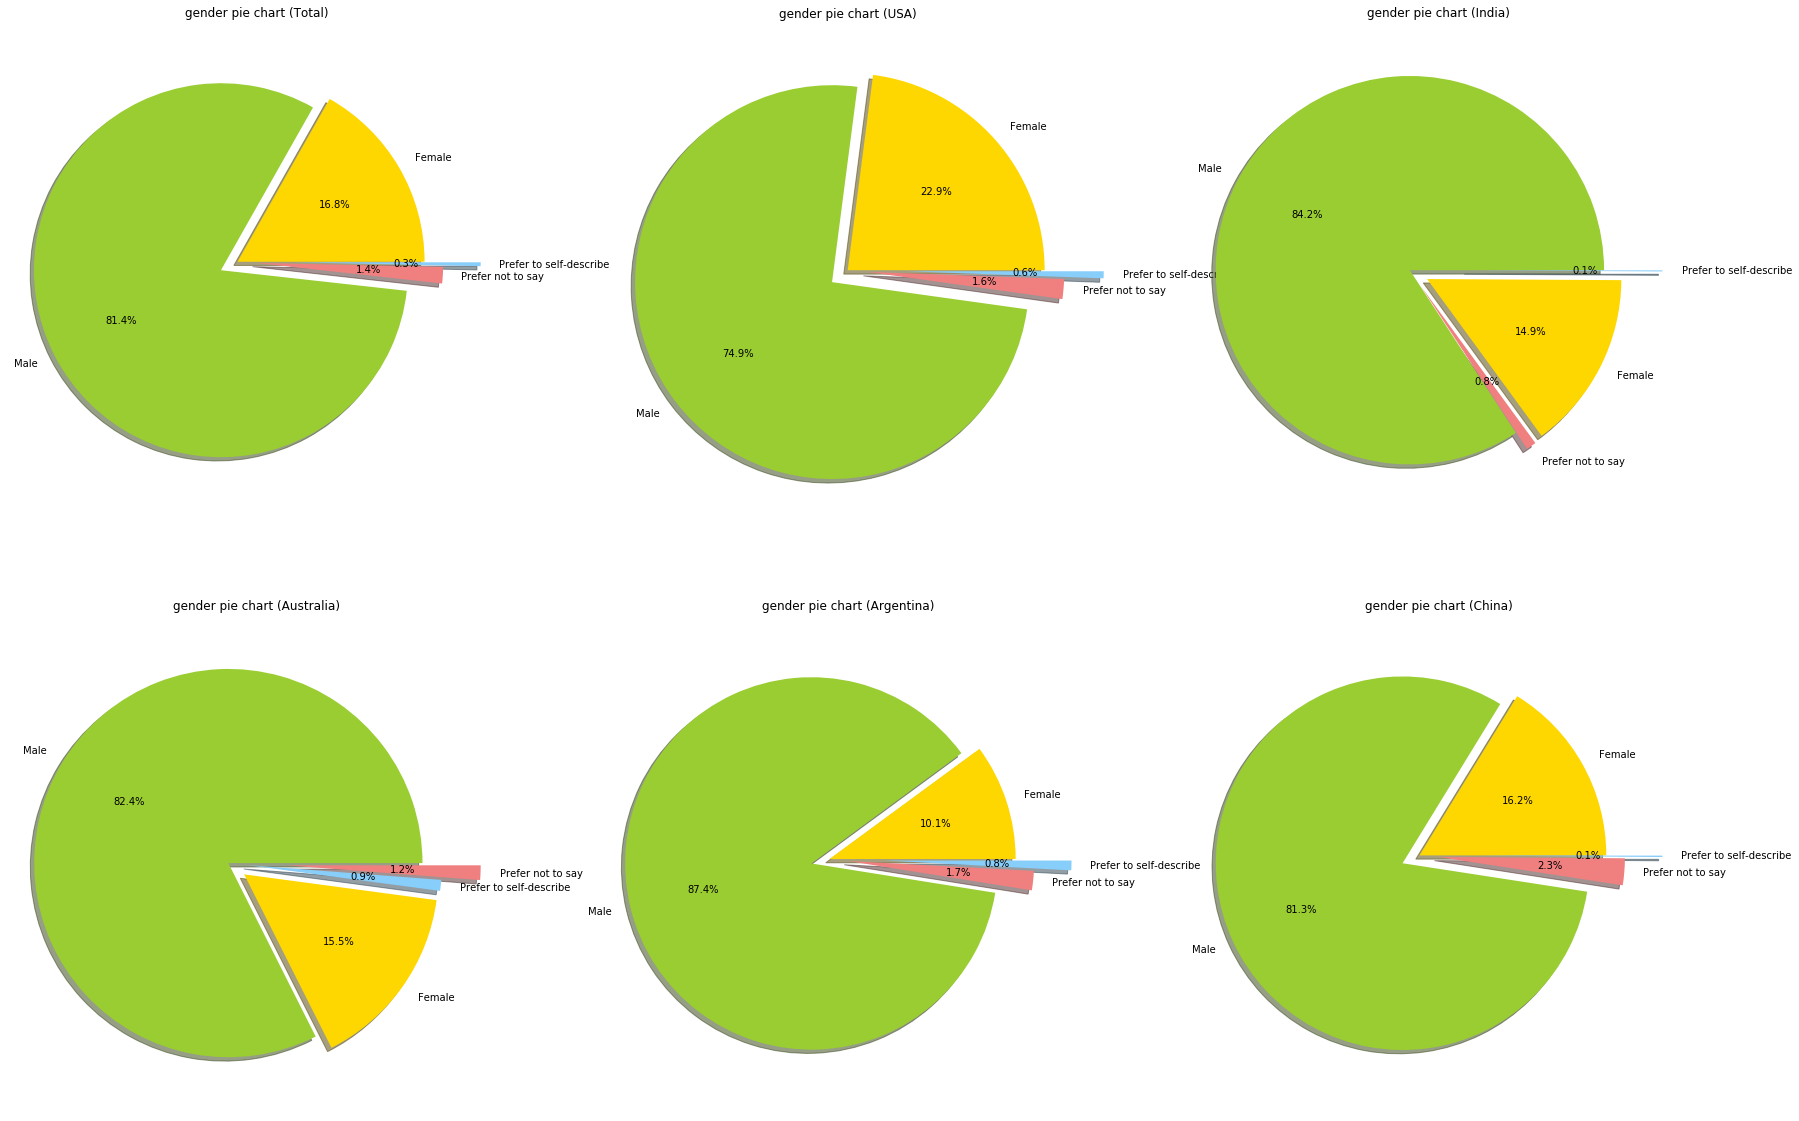

In [10]:
plt.figure(figsize=(30,20))

#Total
gender = Counter(data1['Q1'])
labels = gender.keys()
sizes = gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.subplot(2,3,1)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (Total)')

#USA
USA_df = data1[data1['Q3'] == 'United States of America']
USA_gender = Counter(USA_df['Q1'])
labels = USA_gender.keys()
sizes = USA_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.subplot(2,3,2)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.title('gender pie chart (USA)')

#India
India_df = data1[data1['Q3'] == 'India']
India_gender = Counter(India_df['Q1'])
labels = India_gender.keys()
sizes = India_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue']
plt.subplot(2,3,3)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (India)')

#Australia
Australia_df = data1[data1['Q3'] == 'Australia']
Australia_gender = Counter(Australia_df['Q1'])
labels = Australia_gender.keys()
sizes = Australia_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.subplot(2,3,4)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (Australia)')

#Argentina
Argentina_df = data1[data1['Q3'] == 'Argentina']
Argentina_gender = Counter(Argentina_df['Q1'])
labels = Argentina_gender.keys()
sizes = Argentina_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.subplot(2,3,5)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (Argentina)')

#China
China_df = data1[data1['Q3'] == 'China']
China_gender = Counter(China_df['Q1'])
labels = China_gender.keys()
sizes = China_gender.values()
explode = (0,0.1,0.1,0.3)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.subplot(2,3,6)
plt.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', explode=explode)
plt.axis('equal')
plt.title('gender pie chart (China)')

plt.show()

# PREDICTING SALARY

In [24]:
data1 = data1.rename(columns={'Q1': 'gender', 'Q2': 'age', 'Q3': 'country', 'Q4': 'education', 'Q5': 'major', 'Q6': 'role', 'Q7': 'industry','Q8': 'experience', 'Q9': 'salary'})

In [44]:
a = data1['salary'] == 'I do not wish to disclose my approximate yearly compensation'
data2 = data1[~a]

In [72]:
#redefine salary
salary_list = np.zeros(len(data2))
num = 0
for s in data2['salary']:
    try:
        math.isnan(s)
        salary_list[num] = float('NaN')
        num += 1
    except:
        if s == '500,000+':
            salary_list[num] = 500.0
        else:
            salary_list[num] = np.max(np.int_(np.array(s[:-4].split('-'))))
        num+=1
data2.loc[:,'salary x1000 (USD)'] = salary_list

#redefine age
age_list = np.zeros(len(data2))
num = 0
for age in data2['age']:
    try:
        math.isnan(age)
        age_list[num] = float('NaN')
        num += 1
    except:
        if age == '80+':
            age_list[num] = 80.0
        else:
            age_list[num] = np.max(np.int_(np.array(age.split('-'))))
        num+=1
data2.loc[:,'age (years)'] = age_list
        
#redefine experience
exp_list = np.zeros(len(data2))
num = 0
for exp in data2['experience']:
    try:
        math.isnan(exp)
        exp_list[num] = float('NaN')
        num += 1
    except:
        if exp == '30 +':
            exp_list[num] = 30.0
        else:
            exp_list[num] = np.max(np.int_(np.array(exp.split('-'))))
        num+=1
data2.loc[:,'experience (years)'] = exp_list

/srv/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [74]:
data2[['gender', 'age (years)', 'country', 'education', 'major', 'role', 'industry','experience (years)', 'salary x1000 (USD)']].dropna()

,gender,age (years),country,education,major,role,industry,experience (years),salary x1000 (USD)
2,Male,34.0,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,10.0,20.0
3,Female,34.0,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,1.0,10.0
5,Male,24.0,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,1.0,10.0
7,Male,39.0,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,15.0,20.0
8,Male,21.0,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,1.0,10.0
10,Male,34.0,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,4.0,30.0
12,Male,44.0,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,10.0,150.0
14,Male,29.0,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,2.0,40.0
15,Female,29.0,Argentina,Bachelor’s degree,"A business discipline (accounting, economics, ...",Data Analyst,Other,2.0,20.0
16,Male,29.0,Japan,Master’s degree,Engineering (non-computer focused),Data Scientist,Medical/Pharmaceutical,1.0,40.0
